## **Predictive Modeling and Risk Assessment of Groundwater Quality Using Machine Learning Techniques: A Case Study of India**

>Loading the Ground Water Quality data

In [ ]:
# #load the data
# from google.colab import files
# uploaded = files.upload()

In [ ]:
import pandas as pd # a common package for viewing tabular data
import io

In [ ]:
data1 = pd.read_csv(io.BytesIO(uploaded['GROUND.csv']),encoding='latin1')

>Creating a DataFrame named '**df_ground**' using the data1

In [ ]:
df_ground = pd.DataFrame(data1)

In [ ]:
print('Shape of the data (rows and columns):')
print(df_ground.shape)
print()
print('List of the column names:')
print(df_ground.columns)
print()
print('The data type of all the columns (all just floats here):')
print(df_ground.dtypes)
df_ground.describe()

Shape of the data (rows and columns):
(7872, 10)

List of the column names:
Index(['Station Code', 'Station Name', 'STATE', 'Temperature Min',
       'Temperature Max', 'pH Min', 'pH Max', 'Conductivity (µmhos/cm) Min',
       'Conductivity (µmhos/cm) Max', 'Year'],
      dtype='object')

The data type of all the columns (all just floats here):
Station Code                   float64
Station Name                    object
STATE                           object
Temperature Min                float64
Temperature Max                float64
pH Min                         float64
pH Max                         float64
Conductivity (µmhos/cm) Min    float64
Conductivity (µmhos/cm) Max    float64
Year                             int64
dtype: object


,Station Code,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Year
count,7239.000000,6693.000000,6693.000000,7187.000000,7186.000000,7104.000000,7109.000000,7872.000000
mean,2675.760050,25.292619,27.164560,7.146350,7.592132,1300.377190,1706.346096,2017.532012
std,988.504615,4.710063,4.497419,0.696021,8.220182,2998.661927,3597.920344,2.716708
min,3.000000,0.000000,0.000000,0.000000,4.600000,0.000000,0.000000,2012.000000
25%,1878.000000,23.000000,25.000000,6.900000,7.200000,290.000000,408.000000,2015.000000
50%,2526.000000,26.000000,28.000000,7.200000,7.500000,690.000000,896.000000,2018.000000
75%,3336.000000,28.000000,30.000000,7.600000,7.900000,1361.500000,1755.000000,2020.000000
max,4912.000000,67.000000,70.000000,9.600000,702.000000,72683.000000,87790.000000,2021.000000


- The data contains about 7872 rows and 10 columns

## **DATA CLEANING**

 > 1. Finding the number of missing values/NAs and duplicates in each column

In [ ]:
# Check for missing values
print("Missing values:\n", df_ground.isnull().sum())

Missing values:
 Station Code                    633
Station Name                     81
STATE                           616
Temperature Min                1179
Temperature Max                1179
pH Min                          685
pH Max                          686
Conductivity (µmhos/cm) Min     768
Conductivity (µmhos/cm) Max     763
Year                              0
dtype: int64


In [ ]:
# Find duplicate rows

df_ground[df_ground.duplicated()]

,Station Code,Station Name,STATE,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Year
1616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
4125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
4126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
4127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
4128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
...,...,...,...,...,...,...,...,...,...,...
6758,NaN,GORAKHPUR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
6764,NaN,NATIONAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
6793,NaN,BENGAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
6834,NaN,GROUND WATER POINT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020


>2. Dropping the rows with missing values in **STATE**  

In [ ]:
# Remove rows where 'STATE' column has missing data
df_ground = df_ground.dropna(subset=['STATE'])

# Verify the changes
print(df_ground.isnull().sum())

Station Code                    17
Station Name                     2
STATE                            0
Temperature Min                563
Temperature Max                563
pH Min                          69
pH Max                          70
Conductivity (µmhos/cm) Min    152
Conductivity (µmhos/cm) Max    147
Year                             0
dtype: int64


- Still there are missing values in **Station Code** even when the **STATE** has values. Let's check the data.

In [ ]:
# Filter the DataFrame to show only rows where 'Station Code' is null
null_station_code_rows = df_ground[df_ground['Station Code'].isnull()]

# Display these rows
null_station_code_rows

,Station Code,Station Name,STATE,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Year
5846,NaN,TOWN,PRADESH,NaN,NaN,NaN,NaN,NaN,NaN,2020
5848,NaN,TOWN,PRADESH,NaN,NaN,NaN,NaN,NaN,NaN,2020
5850,NaN,TOWN,PRADESH,NaN,NaN,NaN,NaN,NaN,NaN,2020
5854,NaN,TEMPLE,PRADESH,NaN,NaN,NaN,NaN,NaN,NaN,2020
5895,NaN,ZANAKOT (I),KASHMIR,NaN,NaN,NaN,NaN,NaN,NaN,2020
5897,NaN,ZANAKOT (II),KASHMIR,NaN,NaN,NaN,NaN,NaN,NaN,2020
5899,NaN,SADAKADAL,KASHMIR,NaN,NaN,NaN,NaN,NaN,NaN,2020
5904,NaN,NaN,KASHMIR,NaN,NaN,NaN,NaN,NaN,NaN,2020
5910,NaN,NaN,KASHMIR,NaN,NaN,NaN,NaN,NaN,NaN,2020
5925,NaN,Name of Monitoring\nLocation,State Name,NaN,NaN,NaN,NaN,NaN,NaN,2020


* Clearly there are some second name of the States are misaligned in the data.
> 3. FIXING THE STATE NAMES

In [ ]:
# Standardize the state names to title case
df_ground['STATE'] = df_ground['STATE'].str.title()

# Add suffixes to specific states
df_ground['STATE'] = df_ground['STATE'].replace({
    'Himachal': 'Himachal Pradesh',
    'Jammu &': 'Jammu & Kashmir',
    'West': 'West Bengal'
})


# Verify the changes
print(df_ground['STATE'].unique())
state_counts = df_ground['STATE'].nunique()

# Display the counts
print(state_counts)

['Andhra Pradesh' 'Assam' 'Manipur' 'Tripura' 'Meghalaya' 'Chhattisgarh'
 'Madhya Pradesh' 'Himachal Pradesh' 'Chandigarh' 'Kerala' 'Daman & Diu'
 'Dadra & Nagar Haveli' 'Tamil Nadu' 'Pondicherry' 'Maharashtra' 'Goa'
 'Rajasthan' 'Uttar Pradesh' 'West Bengal' 'Mizoram' 'Punjab'
 'Lakshadweep' 'Gujarat' 'Uttarakhand' 'Odisha' 'Bihar' 'Jammu & Kashmir'
 'Delhi' 'Karnataka' 'Uttrakhand' 'Telangana' 'Nagaland' 'Jharkhand'
 'Andhra\nPradesh' 'Daman And Diu,\nDadra And\nNagar Haveli' 'Haryana'
 'Himachal\nPradesh' 'Pradesh' 'Jammu &\nKashmir' 'Kashmir' 'State Name'
 'Madhya\nPradesh' 'Puducherry' 'Tamil\nNadu' 'Uttar\nPradesh'
 'West\nBengal' 'Bengal']
47


<ipython-input-12-d8238e436d70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ground['STATE'] = df_ground['STATE'].str.title()
<ipython-input-12-d8238e436d70>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ground['STATE'] = df_ground['STATE'].replace({


In [ ]:
# Remove newline characters and trim whitespace in the 'STATE' column
df_ground['STATE'] = df_ground['STATE'].str.replace('\n', ' ').str.strip()

<ipython-input-13-ee113d46f074>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ground['STATE'] = df_ground['STATE'].str.replace('\n', ' ').str.strip()


In [ ]:
# Correct the misspelling of 'Uttrakhand' to 'Uttarakhand'
# Replace specific state names with 'Daman & Diu, Dadra & Nagar Haveli'
df_ground['STATE'] = df_ground['STATE'].replace({
    'Daman & Diu': 'Daman & Diu, Dadra & Nagar Haveli',
    'Dadra & Nagar Haveli': 'Daman & Diu, Dadra & Nagar Haveli',
    'Daman And Diu, Dadra And Nagar Haveli': 'Daman & Diu, Dadra & Nagar Haveli',
    'Puducherry': 'Pondicherry',
    'Uttrakhand': 'Uttarakhand'
})

<ipython-input-14-641b46bda218>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ground['STATE'] = df_ground['STATE'].replace({


In [ ]:
# Verify the changes
print(df_ground['STATE'].unique())
state_counts = df_ground['STATE'].nunique()

# Display the counts
print('\nCount of states and Union territories =',state_counts)

['Andhra Pradesh' 'Assam' 'Manipur' 'Tripura' 'Meghalaya' 'Chhattisgarh'
 'Madhya Pradesh' 'Himachal Pradesh' 'Chandigarh' 'Kerala'
 'Daman & Diu, Dadra & Nagar Haveli' 'Tamil Nadu' 'Pondicherry'
 'Maharashtra' 'Goa' 'Rajasthan' 'Uttar Pradesh' 'West Bengal' 'Mizoram'
 'Punjab' 'Lakshadweep' 'Gujarat' 'Uttarakhand' 'Odisha' 'Bihar'
 'Jammu & Kashmir' 'Delhi' 'Karnataka' 'Telangana' 'Nagaland' 'Jharkhand'
 'Haryana' 'Pradesh' 'Kashmir' 'State Name' 'Bengal']

Count of states and Union territories = 36


In [ ]:
# Drop rows where 'Station Code' is NA
df_ground = df_ground.dropna(subset=['Station Code'])

# Verify the changes
print(sorted(df_ground['STATE'].unique()))
state_counts = df_ground['STATE'].nunique()

# Display the counts
print(state_counts)


['Andhra Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Daman & Diu, Dadra & Nagar Haveli', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Pondicherry', 'Punjab', 'Rajasthan', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']
32


In [ ]:
# # Drop 'Station Name' column
df_ground = df_ground.drop(columns=['Station Name'])

# Verify the changes
print(df_ground)

      Station Code           STATE  Temperature Min  Temperature Max  pH Min  \
0             15.0  Andhra Pradesh             23.0             28.0    6.82   
1             16.0  Andhra Pradesh             27.0             28.0    7.21   
2             26.0  Andhra Pradesh             26.0             32.0    7.19   
3             27.0  Andhra Pradesh             26.0             27.0    7.82   
4           1513.0  Andhra Pradesh             25.0             30.0    6.80   
...            ...             ...              ...              ...     ...   
7867        2533.0     West Bengal             27.0             30.0    7.20   
7868        1773.0     West Bengal             28.0             31.0    7.30   
7869        1774.0     West Bengal             29.0             31.0    7.30   
7870        2546.0     West Bengal             26.0             30.0    7.20   
7871        2535.0     West Bengal             30.0             31.0    7.90   

      pH Max  Conductivity (µmhos/cm) M

In [ ]:
# Verify the changes in dataframe
print(df_ground.isnull().sum())
print(df_ground.shape)

Station Code                     0
STATE                            0
Temperature Min                546
Temperature Max                546
pH Min                          52
pH Max                          53
Conductivity (µmhos/cm) Min    135
Conductivity (µmhos/cm) Max    130
Year                             0
dtype: int64
(7239, 9)


- Here the main features to determine the water quality are the temperature, pH and Conductivity.
- And after initial cleaning,we got 7239 rows with few missing values in the main feature. Let's impute the missing values

> 4. CHECKING FOR OUTLIERS

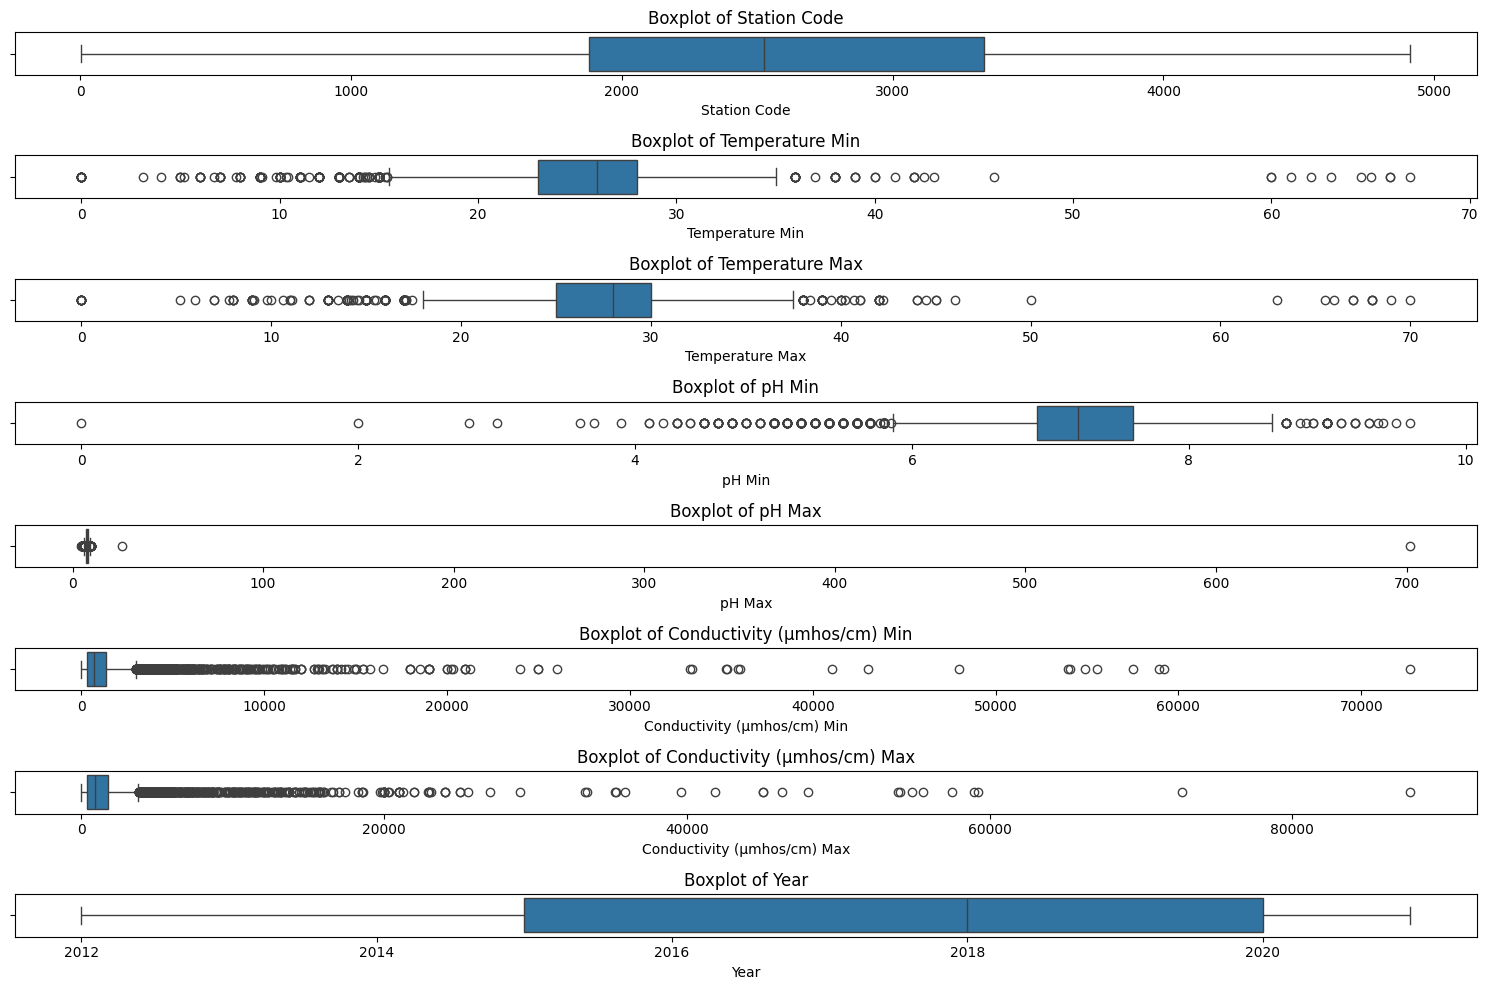

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplots for each numeric column
numeric_columns = df_ground.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.boxplot(x=df_ground[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


- Most of the data seems to be concentrated within a specific range, but the presence of outliers indicates variability and extreme values that could significantly impact analysis.
- Across the variables, outliers are particularly prominent in temperature, pH, and conductivity measurements. These could represent unusual environmental conditions. So we can retain them for further analysis.

> 5. **IMPUTATION**

- Imputation of numerical columns (Temperature Min, Temperature Max, pH Min, pH Max, Conductivity Min, Conductivity Max):
 Using the **median** for imputation since it is robust to outliers.

 - Imputing missing values with the median of each column and also considering the State and Year.

In [ ]:
# Function to impute missing values with the median of each group (State and Year)
def impute_by_group_median(df, group_cols, impute_cols):
    for col in impute_cols:
        df[col] = df.groupby(group_cols)[col].transform(lambda x: x.fillna(x.median()))
    return df

# Columns to group by (State and Year)
group_columns = ['STATE', 'Year']

# Columns to impute
impute_columns = ['Temperature Min', 'Temperature Max', 'pH Min', 'pH Max', 'Conductivity (µmhos/cm) Min', 'Conductivity (µmhos/cm) Max']

# Impute missing values using median by State and Year
df_ground = impute_by_group_median(df_ground, group_columns, impute_columns)

# Check if there are any missing values left
print(df_ground.isnull().sum())


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

Station Code                     0
STATE                            0
Temperature Min                180
Temperature Max                180
pH Min                           2
pH Max                           3
Conductivity (µmhos/cm) Min     11
Conductivity (µmhos/cm) Max      9
Year                             0
dtype: int64


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


**Contextual Imputation:** This method ensures that the imputed values are contextually relevant by considering both State and Year, which likely influence the measurements.
 - This approach ensures that missing values are filled based on the context of the specific ***state*** and ***year***, giving more meaningful imputations rather than a global median.
 - The warnings ***(RuntimeWarning: Mean of empty slice)*** typically occur when you attempt to calculate the mean (or other statistics) on an empty slice of data. This usually happens if a group with all missing values or if a group is missing entirely after filtering or grouping. Let's find these rows

In [ ]:
# View rows where 'pH Min' or 'pH Max' is NA
na_ph_rows = df_ground[df_ground['pH Min'].isna() | df_ground['pH Max'].isna() |
                       df_ground['Conductivity (µmhos/cm) Min'].isna() | df_ground['Conductivity (µmhos/cm) Max'].isna()]

# Display the rows with missing pH values
na_ph_rows


,Station Code,STATE,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Year
55,1920.0,Manipur,17.0,17.0,NaN,NaN,59.4,59.4,2012
528,1898.0,Punjab,NaN,NaN,7.0,7.0,NaN,NaN,2013
529,1899.0,Punjab,NaN,NaN,7.0,7.0,NaN,NaN,2013
530,1900.0,Punjab,NaN,NaN,7.0,7.0,NaN,NaN,2013
531,1901.0,Punjab,NaN,NaN,7.0,7.0,NaN,NaN,2013
532,1902.0,Punjab,NaN,NaN,7.0,7.0,NaN,NaN,2013
533,1903.0,Punjab,NaN,NaN,7.0,7.0,NaN,NaN,2013
1941,3447.0,Uttarakhand,NaN,NaN,NaN,NaN,NaN,NaN,2015
4656,4758.0,Jharkhand,13.0,28.0,6.5,7.6,NaN,NaN,2019
5926,4492.0,Jharkhand,36.0,36.0,7.5,7.5,NaN,260.0,2020


In [ ]:
# Drop rows where both temperature min and max are 0
df_ground = df_ground[~((df_ground['Temperature Min'] == 0) & (df_ground['Temperature Max'] == 0))]

# Drop rows where both pH min and max are 0
df_ground = df_ground[~((df_ground['pH Min'] == 0) & (df_ground['pH Max'] == 0))]

# Drop rows where both conductivity min and max are 0
df_ground = df_ground[~((df_ground['Conductivity (µmhos/cm) Min'] == 0) & (df_ground['Conductivity (µmhos/cm) Max'] == 0))]


In [ ]:
# Drop rows where any of the specified columns have NA
df_ground_cleaned = df_ground.dropna(subset=[
    'Temperature Min', 'Temperature Max',
    'pH Min', 'pH Max',
    'Conductivity (µmhos/cm) Min', 'Conductivity (µmhos/cm) Max'
])

# Verify the changes
print(df_ground_cleaned.isnull().sum())

# check the shape of the cleaned DataFrame to see how many rows were removed
print("\nOriginal DataFrame shape: (7828,10)")
print(f"Cleaned DataFrame shape: {df_ground_cleaned.shape}")

Station Code                   0
STATE                          0
Temperature Min                0
Temperature Max                0
pH Min                         0
pH Max                         0
Conductivity (µmhos/cm) Min    0
Conductivity (µmhos/cm) Max    0
Year                           0
dtype: int64

Original DataFrame shape: (7828,10)
Cleaned DataFrame shape: (7043, 9)


In [ ]:
df_ground_cleaned


,Station Code,STATE,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Year
0,15.0,Andhra Pradesh,23.0,28.0,6.82,7.85,195.0,226.0,2012
1,16.0,Andhra Pradesh,27.0,28.0,7.21,7.72,663.0,1121.0,2012
2,26.0,Andhra Pradesh,26.0,32.0,7.19,7.39,1601.0,1661.0,2012
3,27.0,Andhra Pradesh,26.0,27.0,7.82,8.80,1420.0,1668.0,2012
4,1513.0,Andhra Pradesh,25.0,30.0,6.80,7.11,1454.0,1575.0,2012
...,...,...,...,...,...,...,...,...,...
7867,2533.0,West Bengal,27.0,30.0,7.20,7.90,358.0,651.0,2021
7868,1773.0,West Bengal,28.0,31.0,7.30,7.40,1435.0,1730.0,2021
7869,1774.0,West Bengal,29.0,31.0,7.30,7.30,1705.0,1921.0,2021
7870,2546.0,West Bengal,26.0,30.0,7.20,7.60,909.0,1090.0,2021


After handling the missing values, the shape of the DataFrame has changed from (7828, 10) to (7043, 9), meaning rows and one column were removed in the cleaning process.


## **FEATURE ENGINEERING & EDA**




In [ ]:
df_ground = df_ground_cleaned.copy()

- Creating new columns of **Average Temperature, pH and Conductivity** to calculate the Water Quality Index(WQI).

In [ ]:
# Create new columns for Average Temperature, pH, and Conductivity
df_ground.loc[:, 'Avg Temperature'] = df_ground[['Temperature Min', 'Temperature Max']].mean(axis=1)
df_ground.loc[:, 'Avg pH'] = df_ground[['pH Min', 'pH Max']].mean(axis=1)
df_ground.loc[:, 'Avg Conductivity'] = df_ground[['Conductivity (µmhos/cm) Min', 'Conductivity (µmhos/cm) Max']].mean(axis=1)


# Display the first few rows to verify the new columns
df_ground.head()


,Station Code,STATE,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Year,Avg Temperature,Avg pH,Avg Conductivity
0,15.0,Andhra Pradesh,23.0,28.0,6.82,7.85,195.0,226.0,2012,25.5,7.335,210.5
1,16.0,Andhra Pradesh,27.0,28.0,7.21,7.72,663.0,1121.0,2012,27.5,7.465,892.0
2,26.0,Andhra Pradesh,26.0,32.0,7.19,7.39,1601.0,1661.0,2012,29.0,7.290,1631.0
3,27.0,Andhra Pradesh,26.0,27.0,7.82,8.80,1420.0,1668.0,2012,26.5,8.310,1544.0
4,1513.0,Andhra Pradesh,25.0,30.0,6.80,7.11,1454.0,1575.0,2012,27.5,6.955,1514.5


In [ ]:
# Descriptive statistics for the new features
df_ground[['Avg Temperature', 'Avg pH', 'Avg Conductivity']].describe()



,Avg Temperature,Avg pH,Avg Conductivity
count,7043.000000,7043.000000,7043.000000
mean,26.122277,7.370026,1481.666226
std,4.395782,4.191937,3233.704322
min,5.200000,3.500000,0.500000
25%,24.000000,7.050000,356.250000
50%,27.000000,7.400000,777.500000
75%,29.000000,7.700000,1534.250000
max,67.000000,355.000000,72683.000000


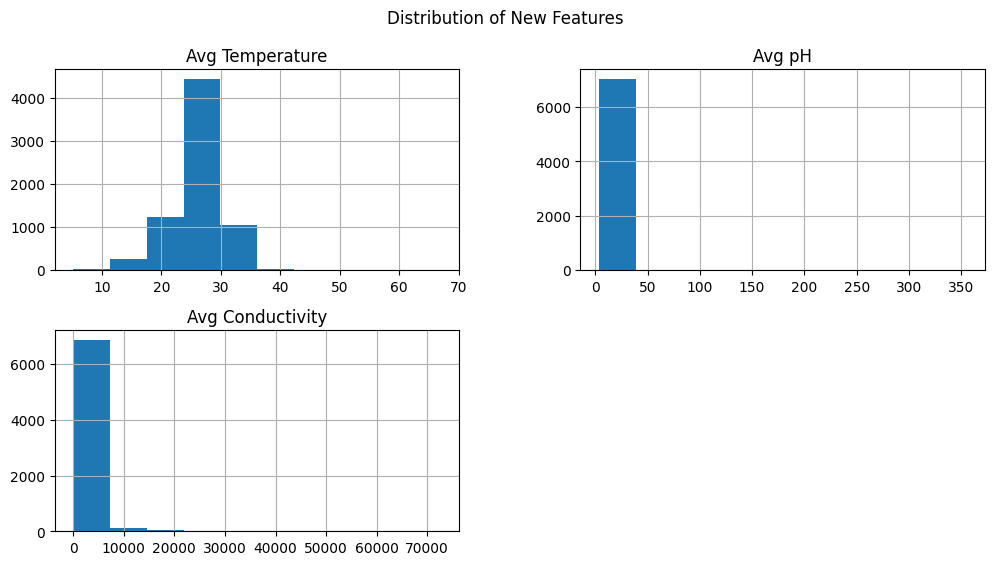

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms for the new features
df_ground[['Avg Temperature', 'Avg pH', 'Avg Conductivity']].hist(bins=10, figsize=(12, 6))
plt.suptitle('Distribution of New Features')
plt.show()


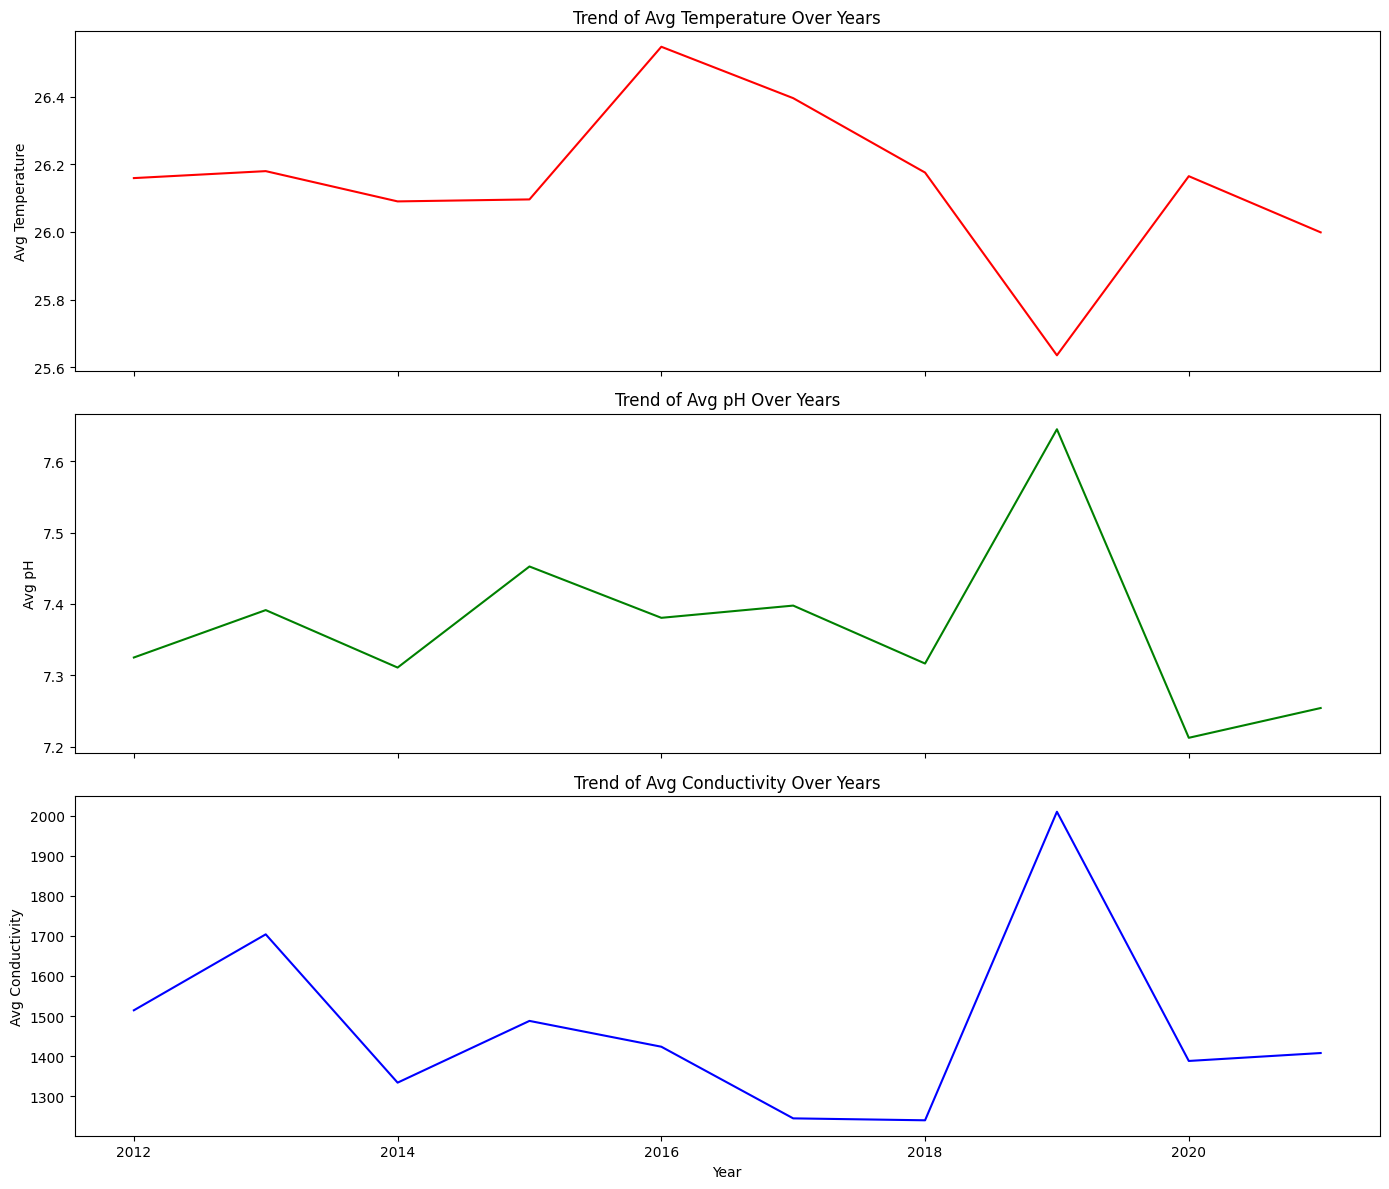

In [ ]:
# Group by Year and calculate the mean of each feature
yearly_data = df_ground.groupby('Year')[['Avg Temperature', 'Avg pH', 'Avg Conductivity']].mean().reset_index()

# Creating a figure with subplots for each feature
fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# Subplot for Avg Temperature
axes[0].plot(yearly_data['Year'], yearly_data['Avg Temperature'], color='r')
axes[0].set_title('Trend of Avg Temperature Over Years')
axes[0].set_ylabel('Avg Temperature')

# Subplot for Avg pH
axes[1].plot(yearly_data['Year'], yearly_data['Avg pH'], color='g')
axes[1].set_title('Trend of Avg pH Over Years')
axes[1].set_ylabel('Avg pH')

# Subplot for Avg Conductivity
axes[2].plot(yearly_data['Year'], yearly_data['Avg Conductivity'], color='b')
axes[2].set_title('Trend of Avg Conductivity Over Years')
axes[2].set_ylabel('Avg Conductivity')
axes[2].set_xlabel('Year')

# Adjust layout for better readability
plt.tight_layout()
plt.show()

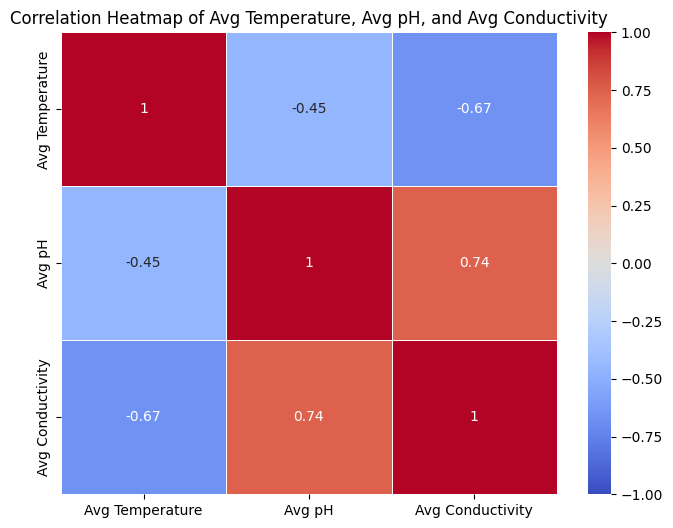

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = yearly_data[['Avg Temperature', 'Avg pH', 'Avg Conductivity']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap of Avg Temperature, Avg pH, and Avg Conductivity')
plt.show()


This heatmap is useful for understanding the relationships between the three parameters and identifying potential factors that might affect each other in the dataset.
- The **strong negative correlation** between *'Avg Temperature'* and *'Avg Conductivity'* suggests that higher temperatures are associated with lower conductivity.
- The **moderate negative correlation** between 'Avg Temperature'* and *'Avg pH indicates'* that higher temperatures might be linked to more acidic conditions (lower pH).
- The **strong positive correlation** between *'Avg pH '*and *'Avg Conductivity'* suggests that higher pH levels (more alkaline) tend to coincide with higher conductivity.

In [ ]:
# Group by State and Year and calculate descriptive statistics
state_year_stats = df_ground.groupby(['STATE', 'Year'])[['Avg Temperature', 'Avg pH', 'Avg Conductivity']].describe().unstack()
state_year_stats

Avg Temperature                          \
                                            count                           
Year                                         2012  2013  2014  2015  2016   
STATE                                                                       
Andhra Pradesh                               24.0  23.0  24.0  31.0  18.0   
Assam                                        31.0  31.0  31.0  32.0  31.0   
Bihar                                         NaN  69.0  41.0  36.0  67.0   
Chandigarh                                    5.0   NaN   NaN   5.0   5.0   
Chhattisgarh                                  3.0   8.0  10.0   8.0   8.0   
Daman & Diu, Dadra & Nagar Haveli            13.0   8.0  12.0  12.0  12.0   
Goa                                           6.0   9.0   9.0   8.0   9.0   
Gujarat                                       NaN  25.0   NaN  60.0  81.0   
Haryana                                       NaN   NaN   NaN   NaN   NaN   
Himachal Pradesh                             40.0  40.0  40.0  39.0  34.0   
Jammu & Kashmir                               NaN   4.0   NaN   4.0   8.0   
Jharkhand                                     NaN   NaN   NaN   NaN   NaN   
Karnataka                                     NaN   NaN   NaN   2.0   NaN   
Kerala                                       30.0  33.0  34.0  34.0  34.0   
Lakshadweep                                   NaN  12.0  12.0  13.0  15.0   
Madhya Pradesh                               10.0  15.0  14.0  17.0  29.0   
Maharashtra                                  50.0  42.0  31.0  35.0  35.0   
Manipur                                       NaN   NaN   NaN   NaN   NaN   
Meghalaya                                     5.0   7.0   NaN   7.0   7.0   
Mizoram                                       NaN   2.0   2.0  11.0  11.0   
Nagaland                                      NaN   NaN   NaN   NaN   NaN   
Odisha                                        NaN  15.0  15.0  15.0  15.0   
Pondicherry                                  15.0  15.0  15.0  15.0  15.0   
Punjab                                        NaN   NaN   NaN  22.0  22.0   
Rajasthan                                    73.0  71.0  69.0  70.0  70.0   
Tamil Nadu                                    1.0   NaN   NaN   2.0   2.0   
Telangana                                     NaN   NaN   NaN   NaN  14.0   
Tripura                                       6.0   7.0   7.0   7.0  21.0   
Uttar Pradesh                                33.0  30.0  34.0  29.0  34.0   
Uttarakhand                                   NaN   1.0   NaN   NaN  19.0   
West Bengal                                  49.0  49.0  47.0  47.0  49.0   

                                                                   ...  \
                                                                   ...   
Year                               2017  2018   2019  2020   2021  ...   
STATE                                                              ...   
Andhra Pradesh                     18.0  18.0   33.0  31.0   33.0  ...   
Assam                              50.0  56.0   64.0  61.0   62.0  ...   
Bihar                              70.0  69.0   39.0  59.0   69.0  ...   
Chandigarh                          5.0   7.0    7.0   7.0    7.0  ...   
Chhattisgarh                        8.0   7.0    7.0   6.0    8.0  ...   
Daman & Diu, Dadra & Nagar Haveli  12.0  12.0   12.0  12.0   11.0  ...   
Goa                                10.0   9.0    8.0   8.0    7.0  ...   
Gujarat                            82.0  77.0   82.0  82.0   77.0  ...   
Haryana                             NaN   NaN    NaN  28.0    3.0  ...   
Himachal Pradesh                   36.0  36.0   34.0  36.0   33.0  ...   
Jammu & Kashmir                     8.0   8.0   13.0  17.0   10.0  ...   
Jharkhand                           NaN   NaN    NaN   NaN    2.0  ...   
Karnataka                           1.0   2.0    2.0   NaN    1.0  ...   
Kerala                             34.0  34.0   34.0  34.0   34.0  ...   
Laksha

In [ ]:
df_ground

,Station Code,STATE,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Year,Avg Temperature,Avg pH,Avg Conductivity
0,15.0,Andhra Pradesh,23.0,28.0,6.82,7.85,195.0,226.0,2012,25.5,7.335,210.5
1,16.0,Andhra Pradesh,27.0,28.0,7.21,7.72,663.0,1121.0,2012,27.5,7.465,892.0
2,26.0,Andhra Pradesh,26.0,32.0,7.19,7.39,1601.0,1661.0,2012,29.0,7.290,1631.0
3,27.0,Andhra Pradesh,26.0,27.0,7.82,8.80,1420.0,1668.0,2012,26.5,8.310,1544.0
4,1513.0,Andhra Pradesh,25.0,30.0,6.80,7.11,1454.0,1575.0,2012,27.5,6.955,1514.5
...,...,...,...,...,...,...,...,...,...,...,...,...
7867,2533.0,West Bengal,27.0,30.0,7.20,7.90,358.0,651.0,2021,28.5,7.550,504.5
7868,1773.0,West Bengal,28.0,31.0,7.30,7.40,1435.0,1730.0,2021,29.5,7.350,1582.5
7869,1774.0,West Bengal,29.0,31.0,7.30,7.30,1705.0,1921.0,2021,30.0,7.300,1813.0
7870,2546.0,West Bengal,26.0,30.0,7.20,7.60,909.0,1090.0,2021,28.0,7.400,999.5


##**CALCULATIONS FOR WATER QUALITY CLASSIFICATION**



- **The Water Quality Index (WQI)** is a tool used to summarize large amounts of water quality data into a single number, reflecting the overall quality of water in a given location. In this case, WQI is calculated based on three key water quality parameters: pH, temperature, and conductivity.
- The WQI is a comprehensive metric that assesses the overall water quality by combining the individual contributions of these parameters.

In [ ]:
ideal_pH = 7.0
max_pH = 8.5
ideal_temp = 25.0
max_temp = 30.0
ideal_conductivity = 300.0
max_conductivity = 1000.0

# Normalize the parameters to calculate sub-indices
df_ground['pH Sub-index'] = ((df_ground['Avg pH'] - ideal_pH) / (max_pH - ideal_pH)) * 100
df_ground['Temp Sub-index'] = ((df_ground['Avg Temperature'] - ideal_temp) / (max_temp - ideal_temp)) * 100
df_ground['Conductivity Sub-index'] = ((df_ground['Avg Conductivity'] - ideal_conductivity) / (max_conductivity - ideal_conductivity)) * 100

# Clip sub-indices to be within 0-100 range to avoid negative values
df_ground['pH Sub-index'] = df_ground['pH Sub-index'].clip(lower=0)
df_ground['Temp Sub-index'] = df_ground['Temp Sub-index'].clip(lower=0)
df_ground['Conductivity Sub-index'] = df_ground['Conductivity Sub-index'].clip(lower=0)


**1. Parameters Normalization: (Sub-Indices Calculation):**
- Initially, each parameter is normalized to a range of 0-100.
- Measurement value is deducted from ideal value and this is then divided by the difference between maximum and ideal values.

$$
\displaystyle
\text{Sub-index} = \frac{(\text{Measured Value} - \text{Ideal Value})}{(\text{Maximum Value} - \text{Ideal Value})} \times 100
$$


- **Example:** Calculation of pH sub-index

 **Formula:** ***pH Sub-index = ((Avg pH - ideal_pH) / (max_pH - ideal_pH)) * 100***

According to this formula, the pH value ranges from 0 to 100, with 0 being the most desirable level of acidity, whereas 100 denotes its highest allowable level.

**2. Clipping Sub-indices:**

In case of any computed sub-index less than zero, the code clips it inside the range 0-100 using the method **clip()**. This ensures that all the sub-indices will have positive values within the acceptable range.


In [ ]:
# Assigning weights based on the importance of the parameter
weights = {
    'pH Sub-index': 0.5,
    'Temp Sub-index': 0.2,
    'Conductivity Sub-index': 0.3
}

# Calculate the weighted sum of sub-indices to get WQI
df_ground['WQI'] = (
    (weights['pH Sub-index'] * df_ground['pH Sub-index']) +
    (weights['Temp Sub-index'] * df_ground['Temp Sub-index']) +
    (weights['Conductivity Sub-index'] * df_ground['Conductivity Sub-index'])
) / sum(weights.values())

**3. Weighting of Sub-Indices:**

Weights are assigned to each of the three water quality parameters, reflecting its relative importance to the total water quality.
- **pH** Sub-index will get the weight of **0.5 or 50%** since pH is one of the important indicators on which the aquatic life or chemical solubility shows interest.
- **Temperature** Sub-index at **0.2 or 20%** reflects its moderate importance. Temperature can have a positive or negative effect on biological activity; however, temperature is less critical than pH.
- **Conductivity** Sub-index was weighted at **0.3 or 30%**, as conductivity is an indication of the existence of dissolved salts or other pollutants in water and very much affects water quality.

**4. Water Quality Index(WQI) Calculation**

The WQI is calculated as the weighted sum of the sub-indices:

$$
WQI = \frac{\sum_{i=1}^{n} w_i}{\sum_{i=1}^{n} w_i} \times \text{Sub-index}_i
$$
where:
$$
\begin{aligned}
\text{Sub-index}_i &= \text{sub-index for the } i\text{-th water quality parameter} \\
w_i &= \text{weight assigned to the } i\text{-th parameter's sub-index} \\
n &= \text{number of parameters being considered}
\end{aligned}
$$
Here:

$$
WQI = \frac{(w_{pH} \times \text{pH Sub-index}) + (w_{Temp} \times \text{Temp Sub-index}) + (w_{Cond} \times \text{Conductivity Sub-index})}{w_{pH} + w_{Temp} + w_{Cond}}
$$





**5. Classification Based on WQI:**

The classification is based on the following ranges:

- **WQI < 25:** Water quality is classified as **"Excellent"**.
- **25 ≤ WQI < 50:** Water quality is classified as **"Good"**.
- **50 ≤ WQI < 75:** Water quality is classified as **"Moderate"**.
- **WQI ≥ 75:** Water quality is classified as **"Poor"**.

In [ ]:
# Classify the water quality based on WQI criteria
def classify_wqi(wqi):
    if wqi < 25:
        return 'Excellent'
    elif 25 <= wqi < 50:
        return 'Good'
    elif 50 <= wqi < 75:
        return 'Moderate'
    else:
        return 'Poor'

df_ground['Water Quality Classification'] = df_ground['WQI'].apply(classify_wqi)

# Display the first few rows to verify the results
df_ground['WQI'].describe()
df_ground


,Station Code,STATE,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Year,Avg Temperature,Avg pH,Avg Conductivity,pH Sub-index,Temp Sub-index,Conductivity Sub-index,WQI,Water Quality Classification
0,15.0,Andhra Pradesh,23.0,28.0,6.82,7.85,195.0,226.0,2012,25.5,7.335,210.5,22.333333,10.0,0.000000,13.166667,Excellent
1,16.0,Andhra Pradesh,27.0,28.0,7.21,7.72,663.0,1121.0,2012,27.5,7.465,892.0,31.000000,50.0,84.571429,50.871429,Moderate
2,26.0,Andhra Pradesh,26.0,32.0,7.19,7.39,1601.0,1661.0,2012,29.0,7.290,1631.0,19.333333,80.0,190.142857,82.709524,Poor
3,27.0,Andhra Pradesh,26.0,27.0,7.82,8.80,1420.0,1668.0,2012,26.5,8.310,1544.0,87.333333,30.0,177.714286,102.980952,Poor
4,1513.0,Andhra Pradesh,25.0,30.0,6.80,7.11,1454.0,1575.0,2012,27.5,6.955,1514.5,0.000000,50.0,173.500000,62.050000,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7867,2533.0,West Bengal,27.0,30.0,7.20,7.90,358.0,651.0,2021,28.5,7.550,504.5,36.666667,70.0,29.214286,41.097619,Good
7868,1773.0,West Bengal,28.0,31.0,7.30,7.40,1435.0,1730.0,2021,29.5,7.350,1582.5,23.333333,90.0,183.214286,84.630952,Poor
7869,1774.0,West Bengal,29.0,31.0,7.30,7.30,1705.0,1921.0,2021,30.0,7.300,1813.0,20.000000,100.0,216.142857,94.842857,Poor
7870,2546.0,West Bengal,26.0,30.0,7.20,7.60,909.0,1090.0,2021,28.0,7.400,999.5,26.666667,60.0,99.928571,55.311905,Moderate


In [ ]:
df_ground['Water Quality Classification'].value_counts()

,count
Water Quality Classification,
Poor,2106
Excellent,1969
Good,1721
Moderate,1247


In [ ]:
df_quality = df_ground[['Station Code','STATE', 'Year', 'Avg Temperature', 'Avg pH', 'Avg Conductivity', 'WQI', 'Water Quality Classification']].copy()
df_quality


,Station Code,STATE,Year,Avg Temperature,Avg pH,Avg Conductivity,WQI,Water Quality Classification
0,15.0,Andhra Pradesh,2012,25.5,7.335,210.5,13.166667,Excellent
1,16.0,Andhra Pradesh,2012,27.5,7.465,892.0,50.871429,Moderate
2,26.0,Andhra Pradesh,2012,29.0,7.290,1631.0,82.709524,Poor
3,27.0,Andhra Pradesh,2012,26.5,8.310,1544.0,102.980952,Poor
4,1513.0,Andhra Pradesh,2012,27.5,6.955,1514.5,62.050000,Moderate
...,...,...,...,...,...,...,...,...
7867,2533.0,West Bengal,2021,28.5,7.550,504.5,41.097619,Good
7868,1773.0,West Bengal,2021,29.5,7.350,1582.5,84.630952,Poor
7869,1774.0,West Bengal,2021,30.0,7.300,1813.0,94.842857,Poor
7870,2546.0,West Bengal,2021,28.0,7.400,999.5,55.311905,Moderate


In [ ]:
import plotly.express as px

In [ ]:
# Calculate the average WQI by state
avg_wqi_by_state = df_quality.groupby('STATE')['WQI'].mean().reset_index().sort_values(by='WQI', ascending=False)

# Create an interactive bar plot
fig = px.bar(avg_wqi_by_state, x='WQI', y='STATE', orientation='h',
             title='Interactive Bar Plot of Average WQI by State',
             labels={'WQI': 'Average Water Quality Index', 'STATE': 'State'},
             color='WQI', color_continuous_scale='Viridis')

# Update layout
fig.update_layout(xaxis_title='Average WQI', yaxis_title='State', coloraxis_showscale=True , height=700)

# Show the plot
fig.show()


In [ ]:
# Create the interactive bar chart with a year slider
fig = px.histogram(df_quality, x='STATE', color='Water Quality Classification',
                   animation_frame='Year', category_orders={'Water Quality Classification': ['Excellent', 'Good', 'Moderate', 'Poor']},
                   title='Water Quality Classification Counts by State and Year',
                   labels={'STATE': 'State', 'count': 'Count'},
                   color_discrete_map={
                       'Excellent': 'darkmagenta',
                       'Good': 'mediumorchid',
                       'Moderate': 'skyblue',
                       'Poor': 'lightsalmon'
                   })

# Customize the layout for better visuals
fig.update_layout(barmode='stack',
                  xaxis={'categoryorder':'category ascending'},
                  yaxis_title='Count',
                  legend_title_text='Water Quality Classification')

# Show the plot with a year slider
fig.show()


In [ ]:
import plotly.express as px
import geopandas as gpd

# Load the GeoJSON for Indian states
gdf = gpd.read_file('states_india.geojson')

# Ensure state names match your df_quality data
gdf['STATE'] = gdf['st_nm'].str.title()  # Match the state names format
df_quality['STATE'] = df_quality['STATE'].str.title()

# Aggregate data by state and year to reduce complexity
df_quality_agg = df_quality.groupby(['STATE', 'Year']).agg({
    'WQI': 'median',
    'Water Quality Classification': pd.Series.mode
}).reset_index()
# Convert the 'Year' column to string format to fix the slider issue
df_quality_agg['Year'] = df_quality_agg['Year'].astype(str)

# Merge the GeoJSON data with df_quality based on the state names
merged_df = gdf.merge(df_quality_agg, how='left', left_on='STATE', right_on='STATE')

# Use the correct featureidkey for the GeoJSON structure
fig = px.choropleth(
    merged_df,
    geojson=gdf,  # Use the GeoDataFrame without simplification
    locations='STATE',  # The state names are used for mapping
    featureidkey='properties.st_nm',  # This must match the state name property in GeoJSON
    color='WQI',  # Use WQI for the color scale
    hover_name='STATE',  # Show state name on hover
    hover_data={
        'WQI': True,
        'Water Quality Classification': True,
        'Year': True
    },
    animation_frame='Year',  # Add a slider for the year
    projection='mercator',  # Set map projection
    title='Water Quality Classification by State in India (2012-2021)',
    color_continuous_scale='Viridis'  # Choose a color scale, e.g., Viridis
)

# Update layout for better visuals
fig.update_geos(fitbounds="locations", visible=False)

# Layout adjustments for better visuals and color bar
fig.update_layout(
    margin={"r": 0, "t": 30, "l": 0, "b": 0},
    coloraxis_colorbar=dict(
        title="Water Quality Index"
    ),
     xaxis=dict(tickmode='array', tickvals=[str(year) for year in range(2012, 2022)]),
    sliders=[{
        'pad': {'b': 10},
        'currentvalue': {'prefix': 'Year: ', 'font': {'size': 15}},
        'steps': [
            {'args': [[str(year)], {'frame': {'duration': 300, 'redraw': True}, 'mode': 'immediate'}], 'label': str(year), 'method': 'animate'}
            for year in range(2012, 2022)
        ]
    }]
)
# Save the HTML file (optional)
fig.write_html('water_quality_choropleth.html')


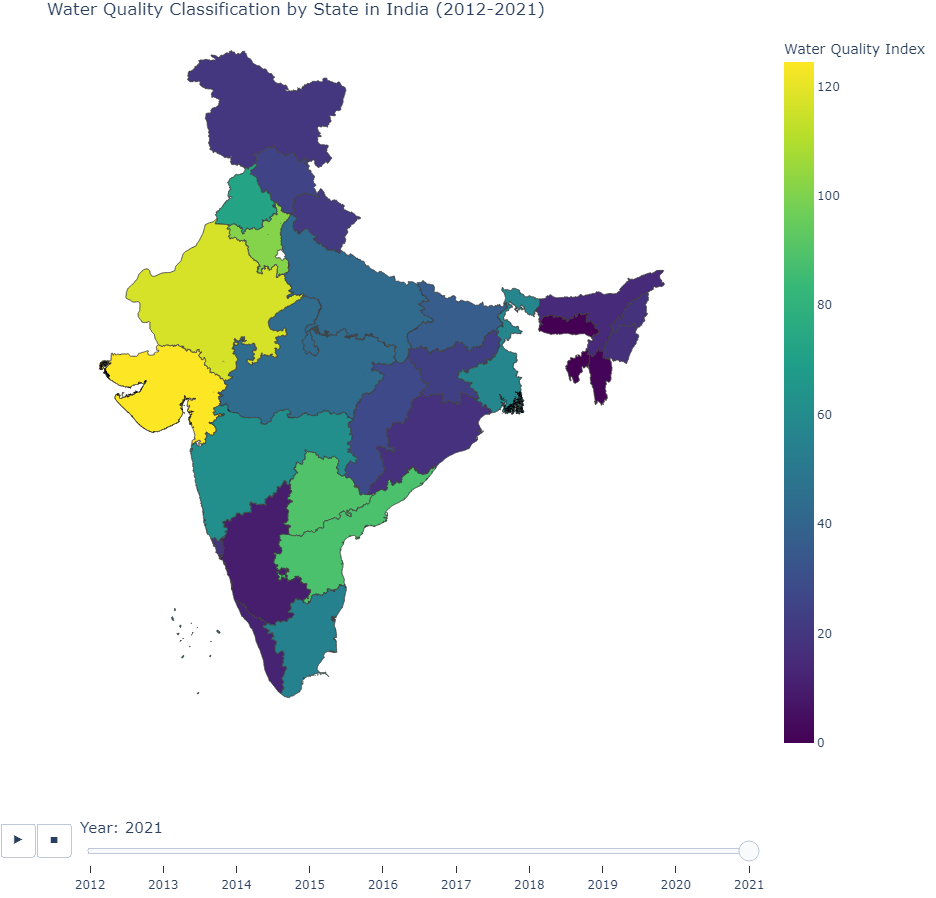

## **MODELLING**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables if necessary (e.g., STATE, Water Quality Classification)
le_state = LabelEncoder()
df_quality['STATE'] = le_state.fit_transform(df_quality['STATE'])

le_quality = LabelEncoder()
df_quality['Water Quality Classification'] = le_quality.fit_transform(df_quality['Water Quality Classification'])


In [ ]:
# Feature selection (choosing relevant features for modeling)
features = ['Avg Temperature', 'Avg pH', 'Avg Conductivity', 'STATE', 'Year']
target = 'Water Quality Classification'

X = df_quality[features]
y = df_quality[target]

In [ ]:
# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize the model
log_reg = LogisticRegression(random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_log_reg))
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       602
           1       0.79      0.84      0.81       528
           2       0.84      0.74      0.79       371
           3       0.95      0.96      0.96       612

    accuracy                           0.88      2113
   macro avg       0.87      0.86      0.87      2113
weighted avg       0.88      0.88      0.88      2113

Accuracy: 0.8774254614292475


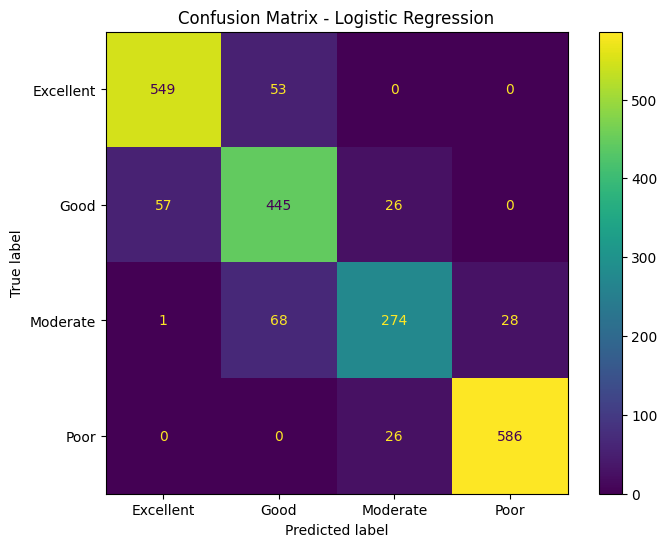

In [ ]:
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_log_reg)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay(cm, display_labels=le_quality.classes_).plot(ax=ax)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [ ]:
from sklearn.svm import SVC

# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42)

# Train the model
svm_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_svm = svm_classifier.predict(X_test)
print(classification_report(y_test, y_pred_svm))
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")


              precision    recall  f1-score   support

           0       0.96      0.89      0.92       602
           1       0.79      0.92      0.85       528
           2       0.82      0.78      0.80       371
           3       0.96      0.93      0.95       612

    accuracy                           0.89      2113
   macro avg       0.88      0.88      0.88      2113
weighted avg       0.89      0.89      0.89      2113

Accuracy: 0.8887837198296261


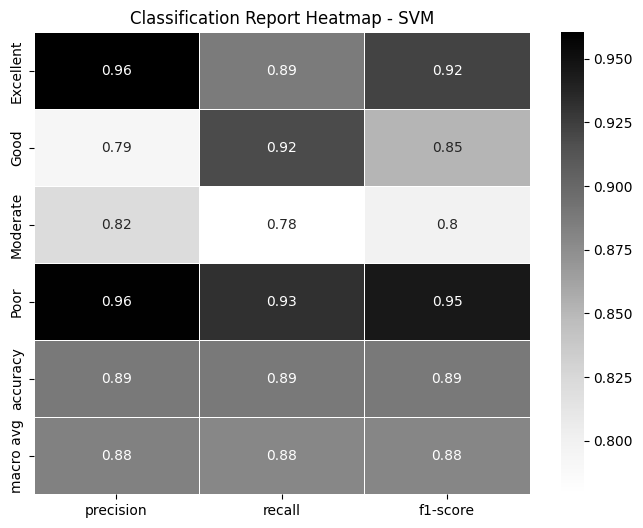

In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred_svm, target_names=le_quality.classes_, output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Plot a heatmap of the classification report
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Greys', linewidths=0.5)
plt.title("Classification Report Heatmap - SVM")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_clf = RandomForestClassifier(random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")


Random Forest Results:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       602
           1       0.94      0.96      0.95       528
           2       0.93      0.90      0.92       371
           3       0.98      0.97      0.98       612

    accuracy                           0.96      2113
   macro avg       0.96      0.96      0.96      2113
weighted avg       0.96      0.96      0.96      2113

Accuracy: 0.9635589209654519


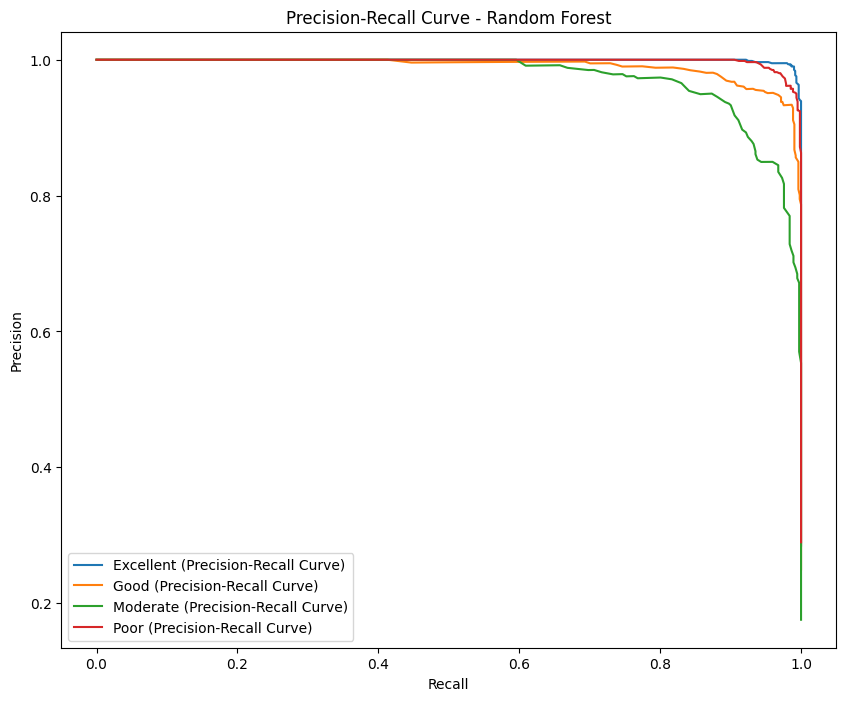

In [ ]:
from sklearn.metrics import precision_recall_curve

# Plot Precision-Recall curve for each class
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(le_quality.classes_):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score_rf[:, i])
    plt.plot(recall, precision, label=f'{class_name} (Precision-Recall Curve)')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest')
plt.legend(loc='lower left')
plt.show()


**INTERPRETATION**

- **High Precision:** The  Random Forest model presents high precisions for the classes "Excellent" and "Good".

- **Moderate and Poor Trade-off:** As the model tries to increase recall (correctly identifies more positive instances), it gives away some of the precision on the "Moderate" and "Poor" classes, resulting in false positives for the two classes.

In general, this plot suggests that the model performs very well for "Excellent" and "Good" classifications but seems to struggle somewhat to balance precision and recall for "Moderate" and "Poor" classes. This may be explained by there being more feature space overlap for these classes.

In [ ]:
from xgboost import XGBClassifier

# Initialize the model
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Train the model
xgb_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_clf.predict(X_test)

# Evaluate the model
print("XGBoost Results:")
print(classification_report(y_test, y_pred_xgb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[22:46:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBoost Results:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       602
           1       0.97      0.95      0.96       528
           2       0.92      0.94      0.93       371
           3       0.98      0.98      0.98       612

    accuracy                           0.97      2113
   macro avg       0.97      0.97      0.97      2113
weighted avg       0.97      0.97      0.97      2113

Accuracy: 0.9697113109323237


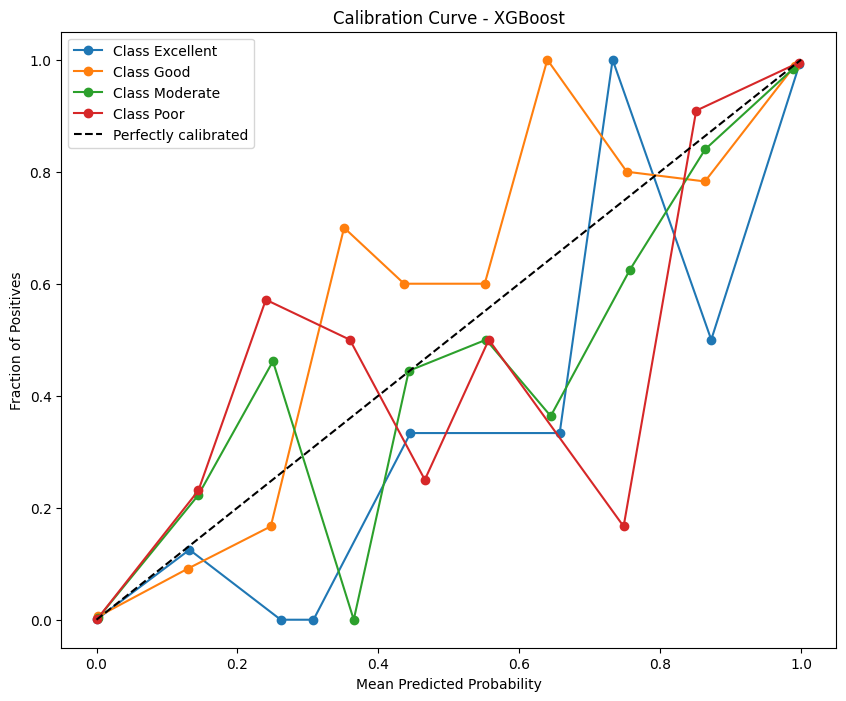

In [ ]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Predict probabilities for each class
y_prob_xgb = xgb_clf.predict_proba(X_test)

# For multi-class problems, you can create a calibration curve for each class
plt.figure(figsize=(10, 8))

# Plot calibration curve for each class
for i, class_name in enumerate(le_quality.classes_):
    prob_true, prob_pred = calibration_curve((y_test == i), y_prob_xgb[:, i], n_bins=10)
    plt.plot(prob_pred, prob_true, marker='o', label=f'Class {class_name}')

# Add labels and title
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.title('Calibration Curve - XGBoost')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.legend(loc='best')
plt.show()


- **Perfect Calibration Line(Black Dashed Line):** Perfect calibration is represented by the black dashed line and represents where the predicted probabilities perfectly match the actual observed outcomes. For example, if the model predicts 0.7 probability, this should mean that 70% of the cases actually belong to the predicted class.

- **Class-wise Curves:**
  - **Blue (Class Excellent):** The calibration curve of the Excellent class is deviating from the perfect calibration line for both low and high predicted probabilities. It indicates that, in the case of low and high predicted probabilities, the model is underconfident(below the line), or overconfident(above the line).
  - **Orange (Class Good):** The Good class curve has a lot of deviation. This shows the overconfidence or under-confidence of the model with respect to different ranges of predicted probabilities. For this class, there is a poor calibration; more precisely, it is between the range of 0.3 to 0.7 probabilities.
  - **Green (Moderate class):** The Moderate class curve also fluctuates, meaning at the lower predicted probability, the model is under-confident (below the line). Mid-range and higher probabilities indicate overconfidence.
  - **Red (Poor class):** The Poor class follows the line of perfect calibration for the high probabilities but shows under-confidence in the mid to low probabilities.


##**HYPERPARAMETER TUNING**

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Initialize the XGBoost model
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter combinations to try
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best Hyperparameters: {random_search.best_params_}")

# Train the XGBoost model with the best hyperparameters
best_xgb_clf = random_search.best_estimator_

# Predict on the test set
y_pred_best_xgb = best_xgb_clf.predict(X_test)

# Evaluate the tuned model
print("Tuned XGBoost Results:")
print(classification_report(y_test, y_pred_best_xgb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_xgb)}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[23:36:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0.5, 'colsample_bytree': 1.0}
Tuned XGBoost Results:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       602
           1       0.97      0.95      0.96       528
           2       0.93      0.94      0.94       371
           3       0.99      0.98      0.98       612

    accuracy                           0.97      2113
   macro avg       0.97      0.97      0.97      2113
weighted avg       0.97      0.97      0.97      2113

Accuracy: 0.971131093232371


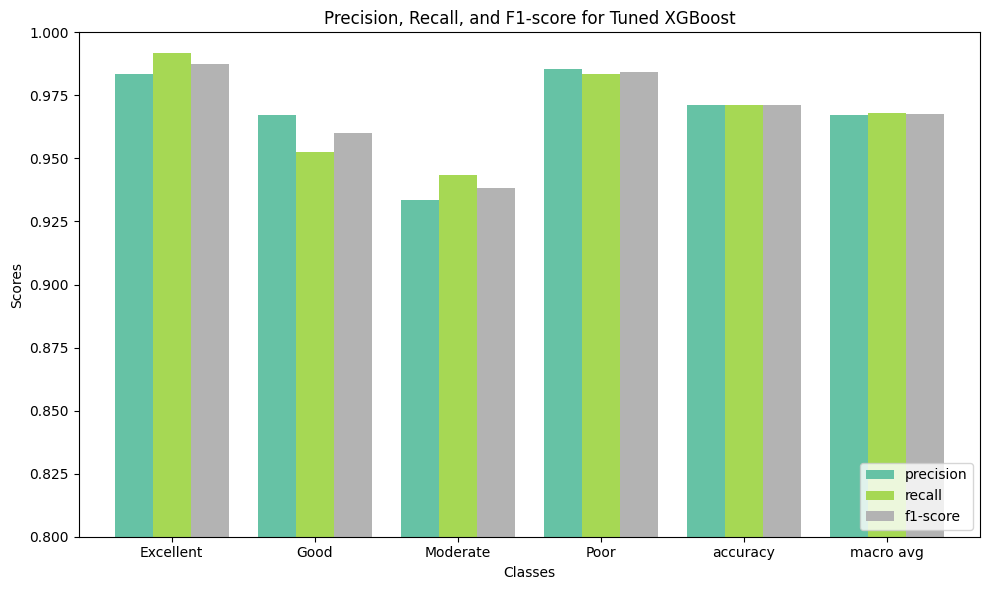

In [ ]:
# Get the classification report as a dictionary
report = classification_report(y_test, y_pred_best_xgb, target_names=le_quality.classes_, output_dict=True)

# Convert the report to a DataFrame for easier plotting
df_report = pd.DataFrame(report).transpose()

# Extract precision, recall, and f1-score for each class (ignore accuracy row)
metrics = df_report[['precision', 'recall', 'f1-score']].iloc[:-1]

# Plotting precision, recall, and F1-score as a bar chart
metrics.plot(kind='bar', figsize=(10, 6), colormap='Set2', width=0.8)

# Set plot labels and title
plt.title('Precision, Recall, and F1-score for Tuned XGBoost')
plt.xlabel('Classes')
plt.ylabel('Scores')
plt.xticks(rotation=0)
plt.ylim([0.8, 1.0])  # Adjusting y-axis range for better clarity
plt.legend(loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()
